   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

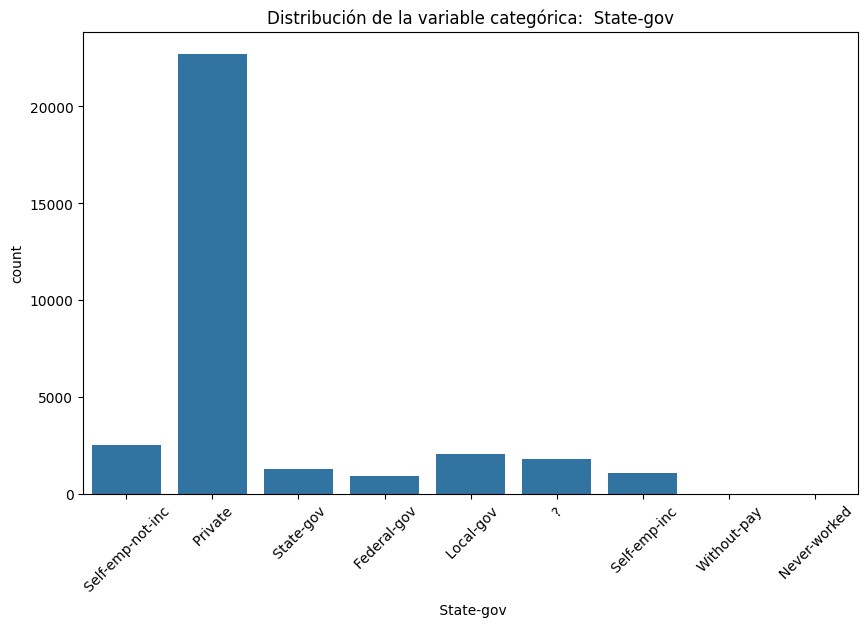

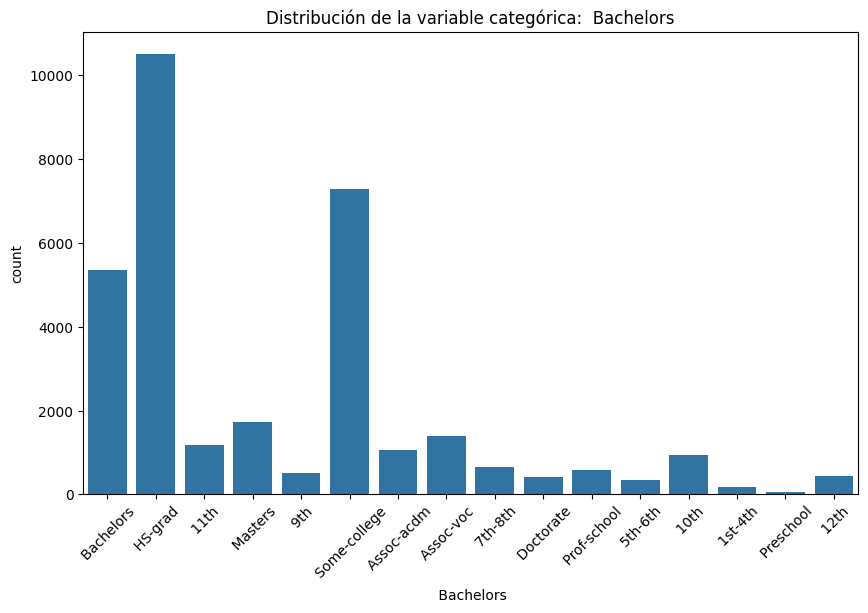

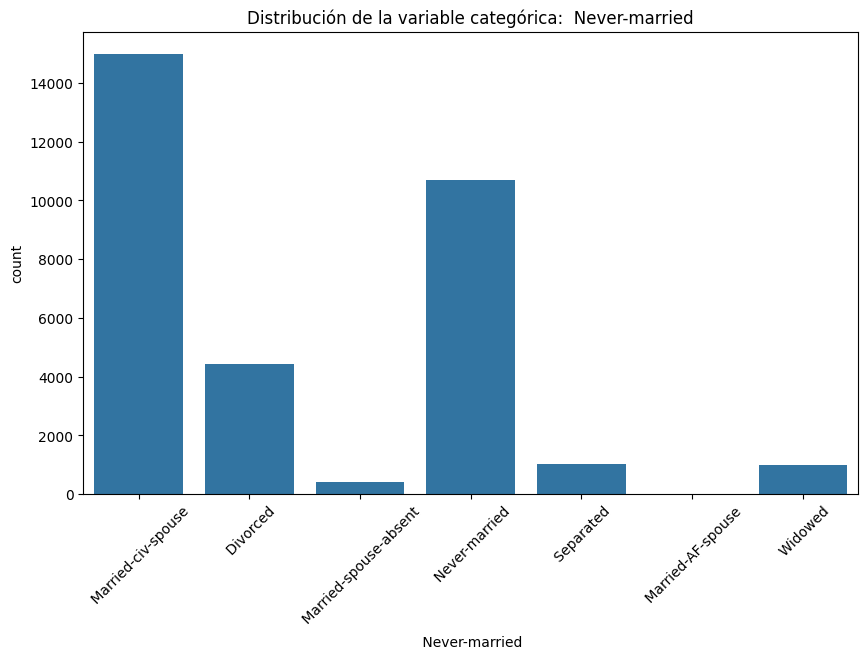

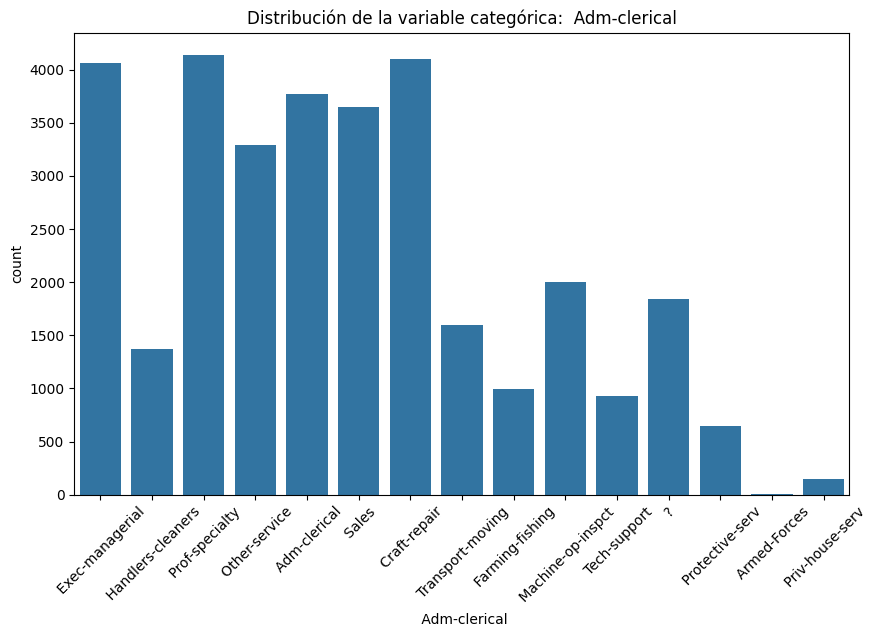

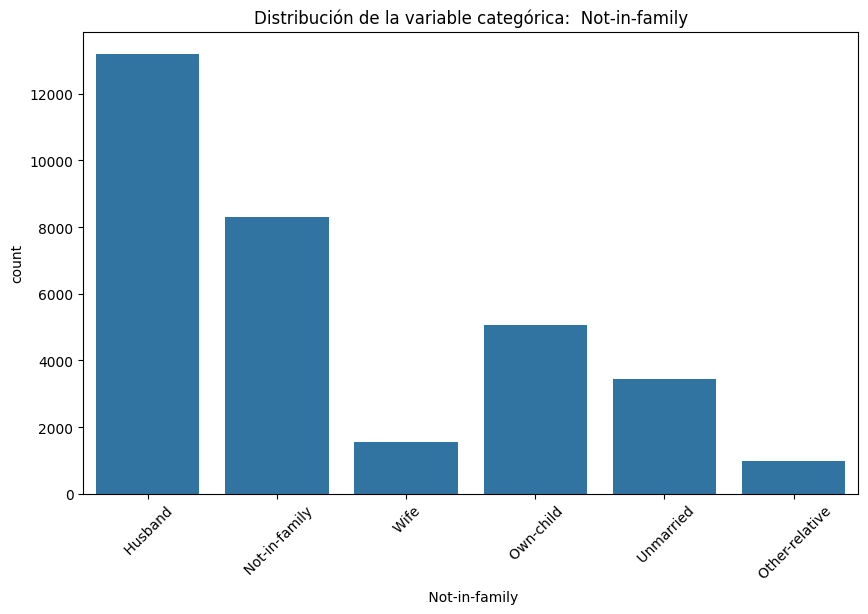

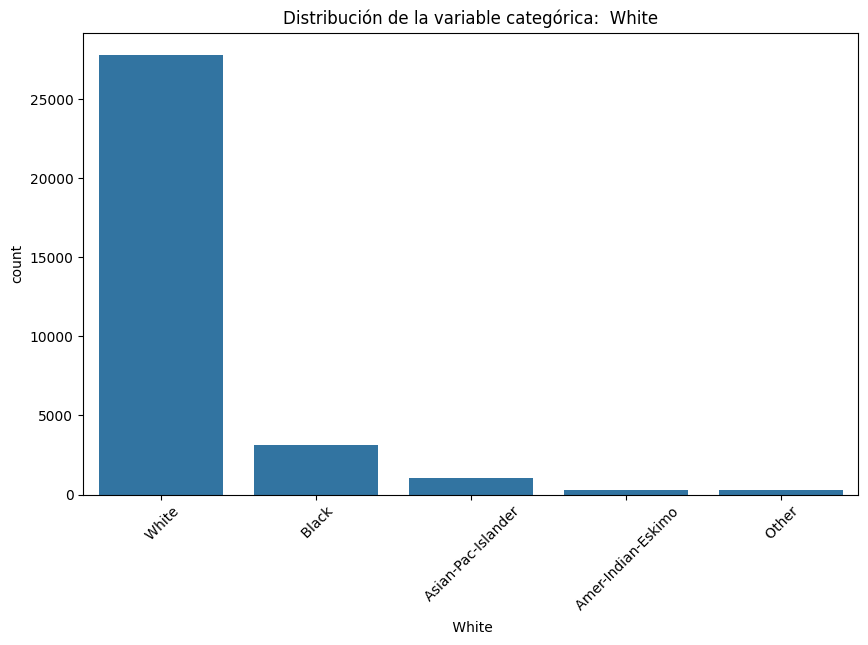

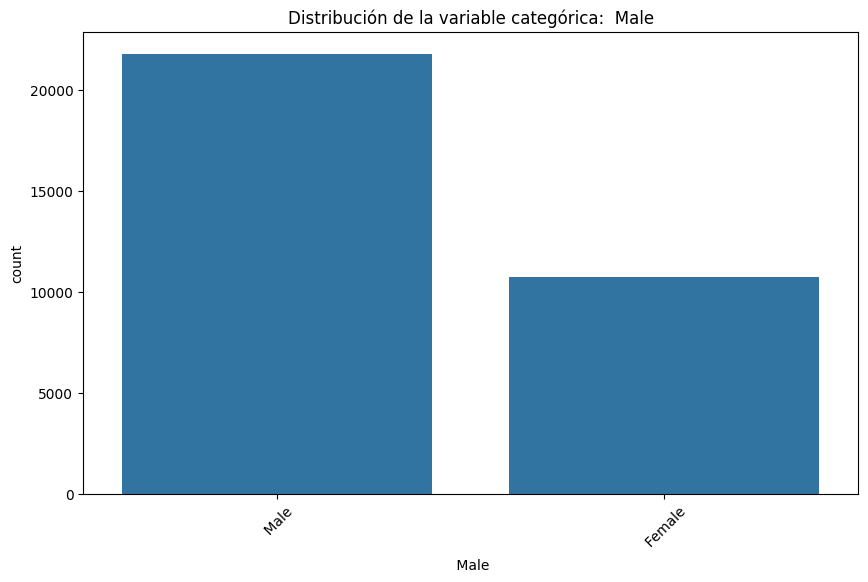

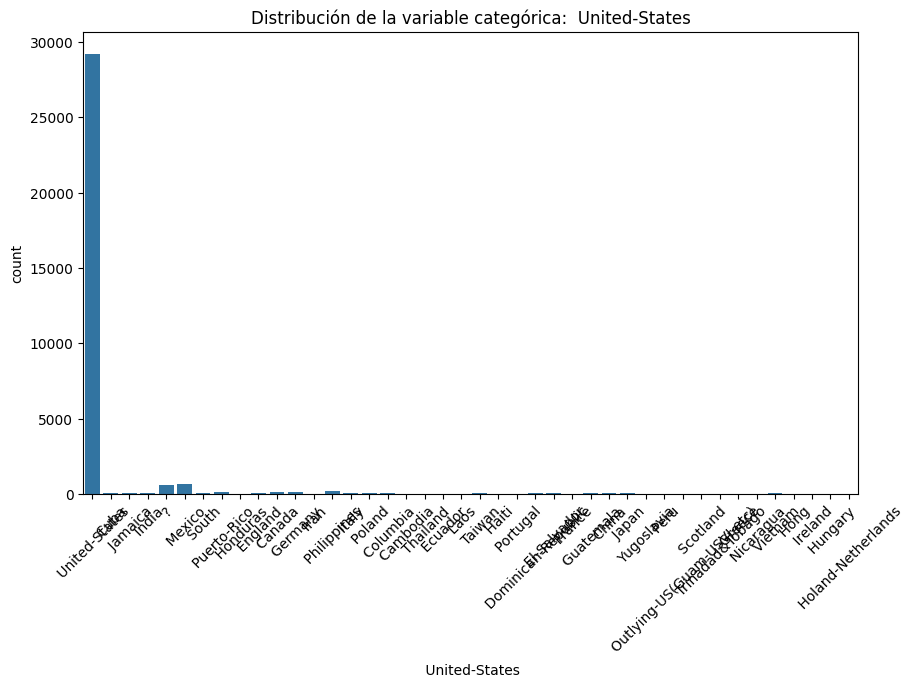

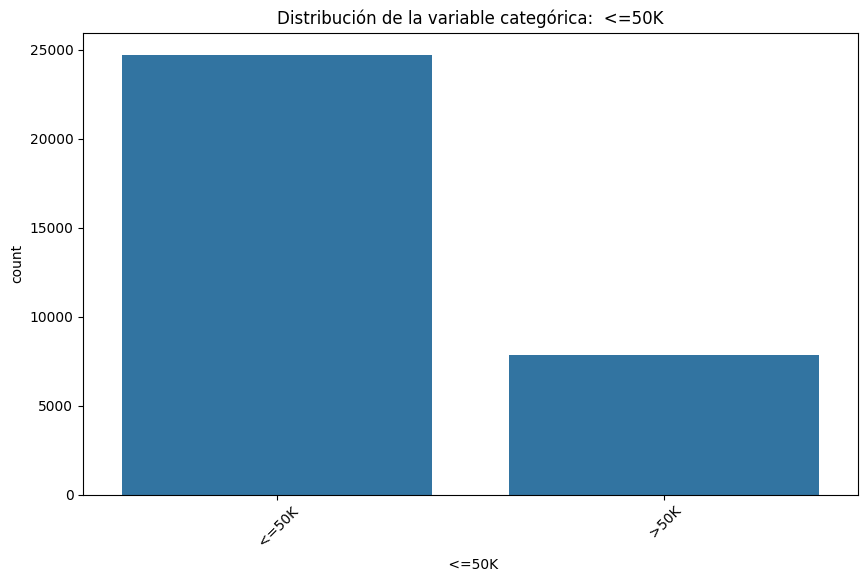

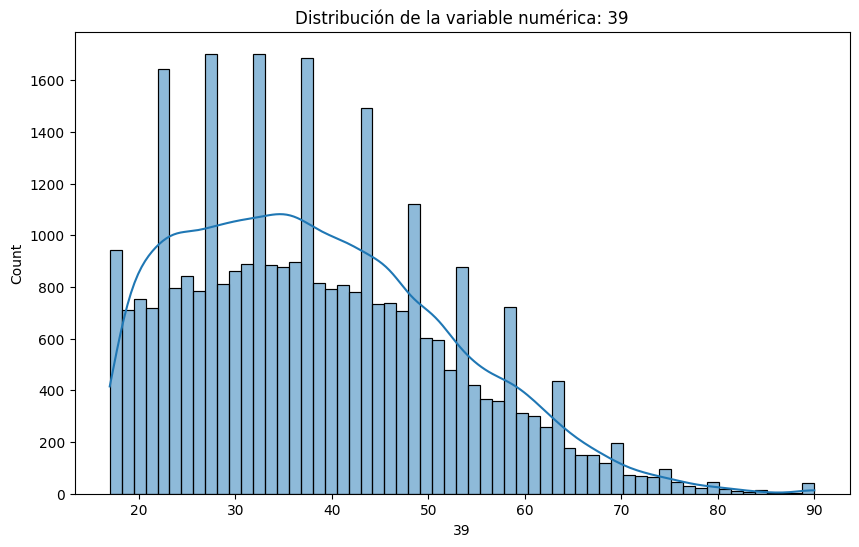

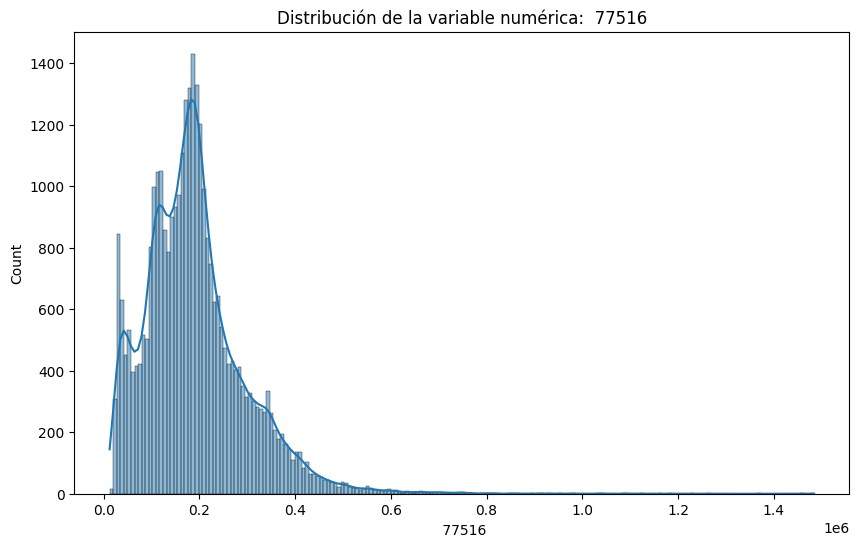

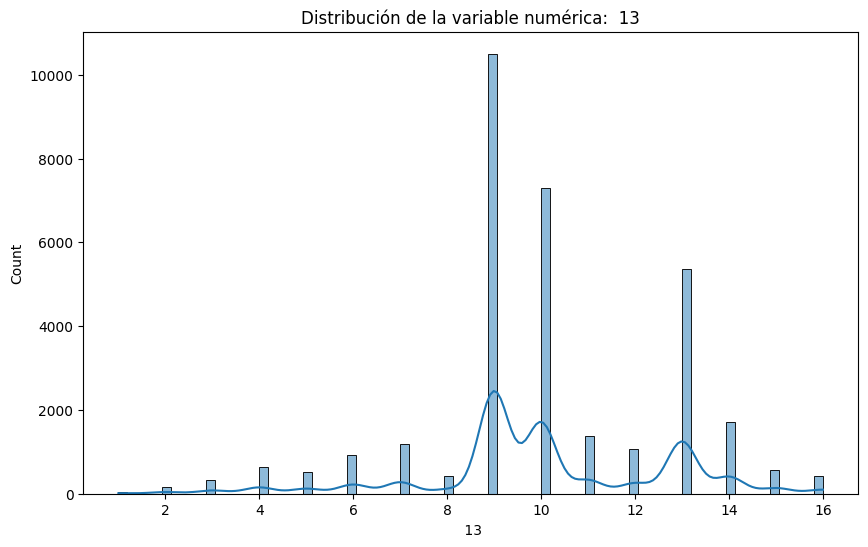

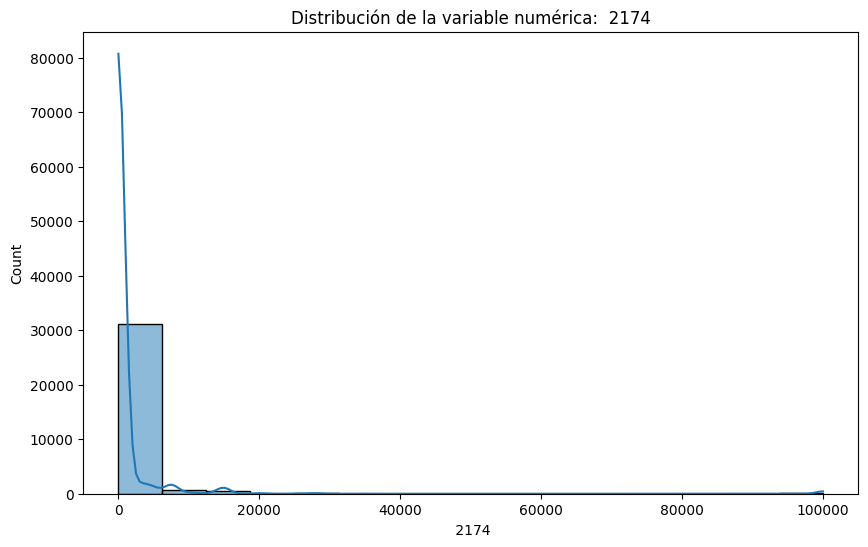

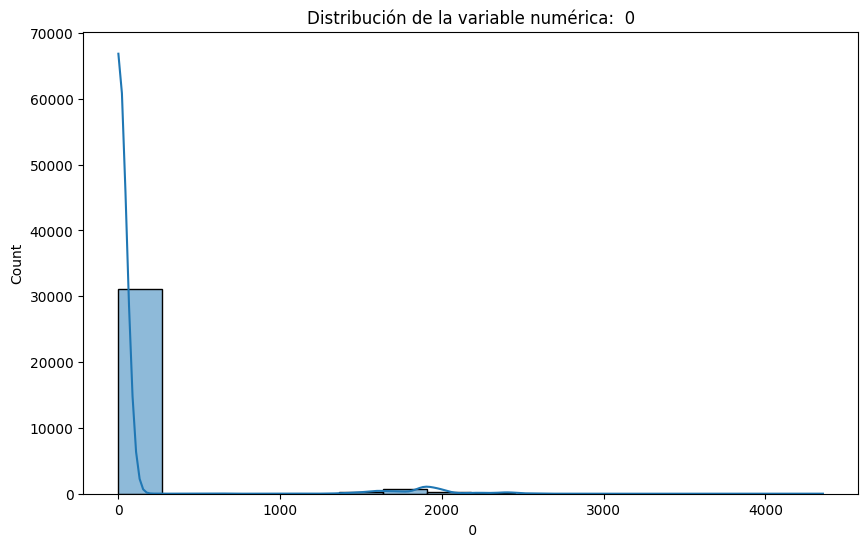

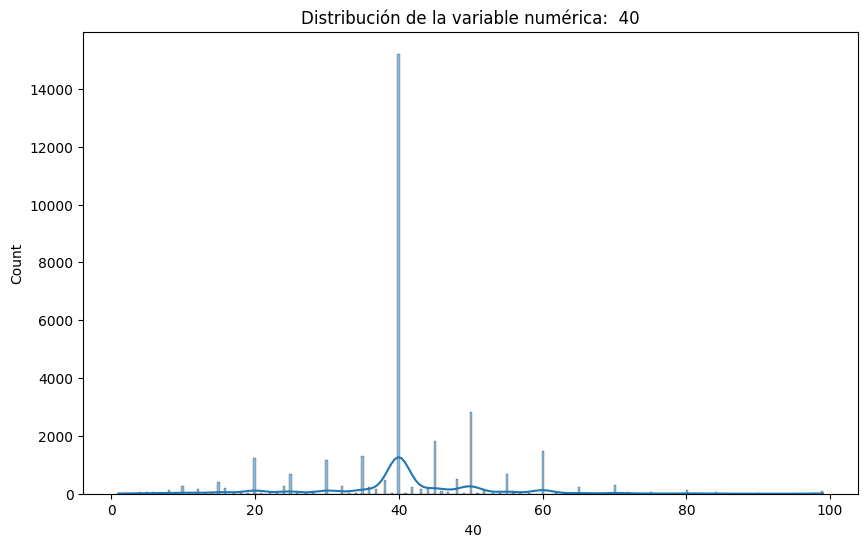

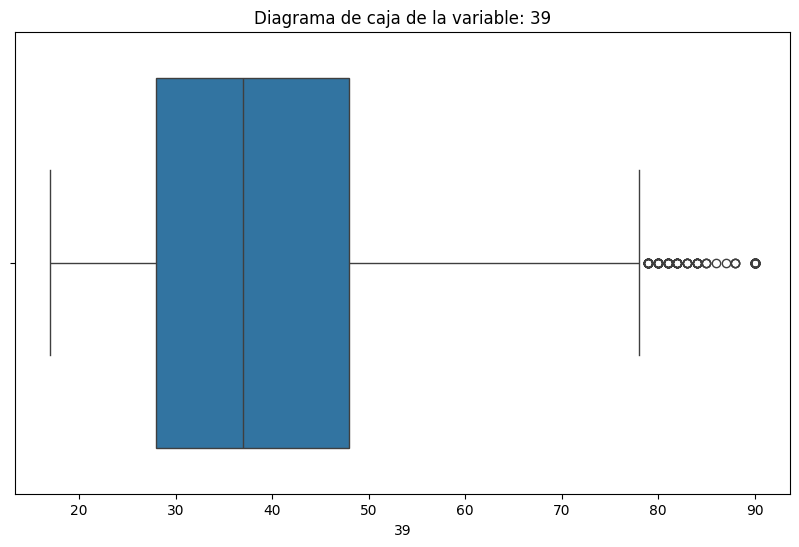

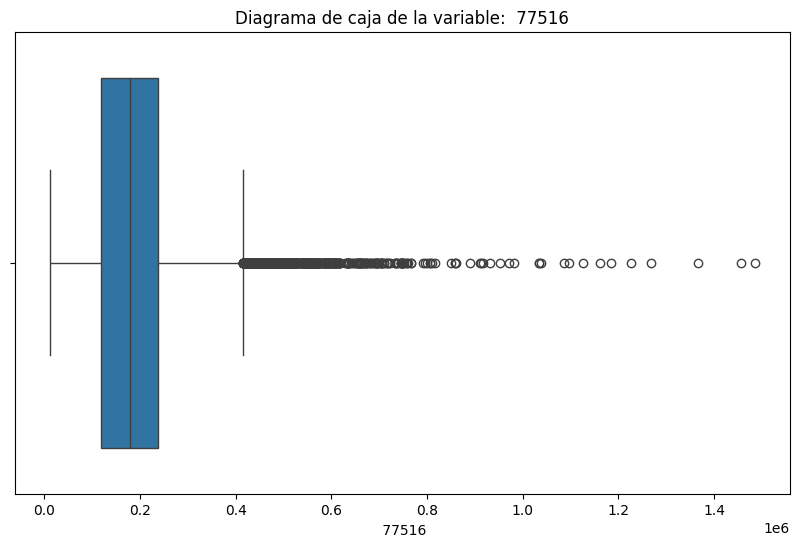

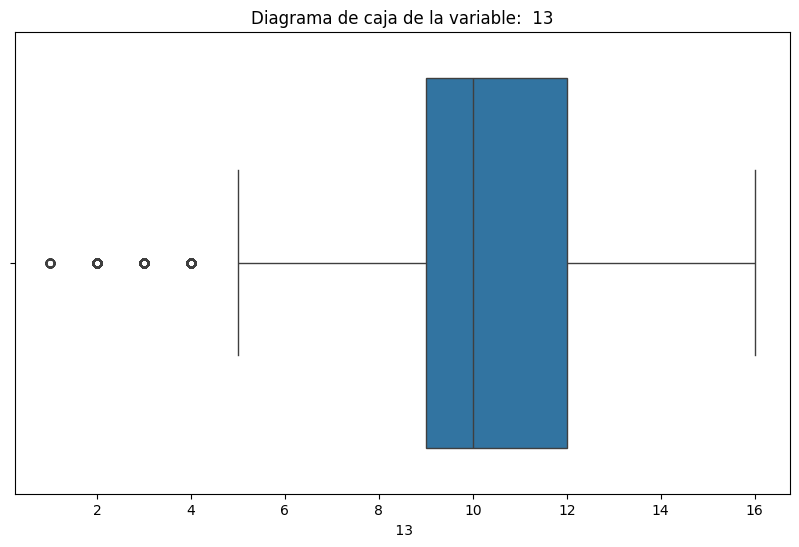

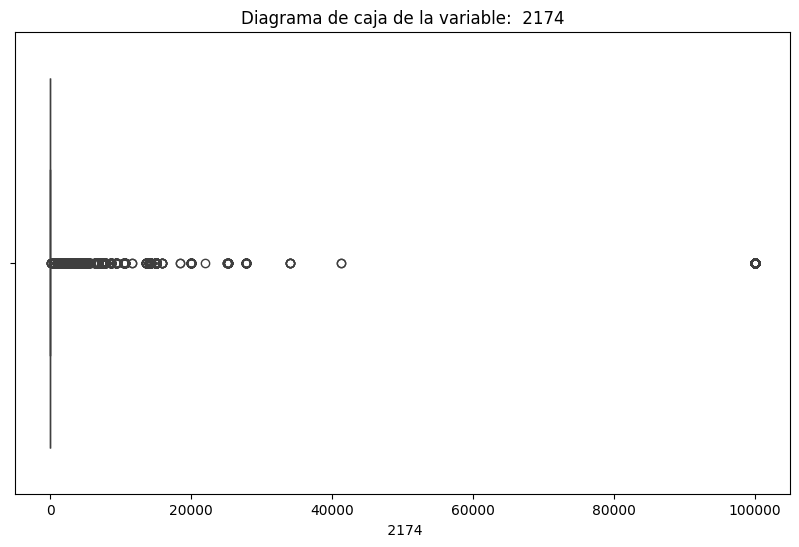

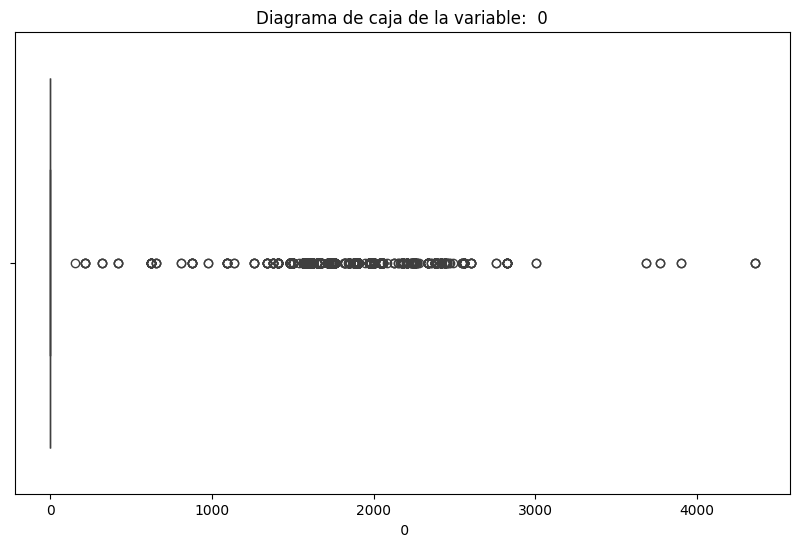

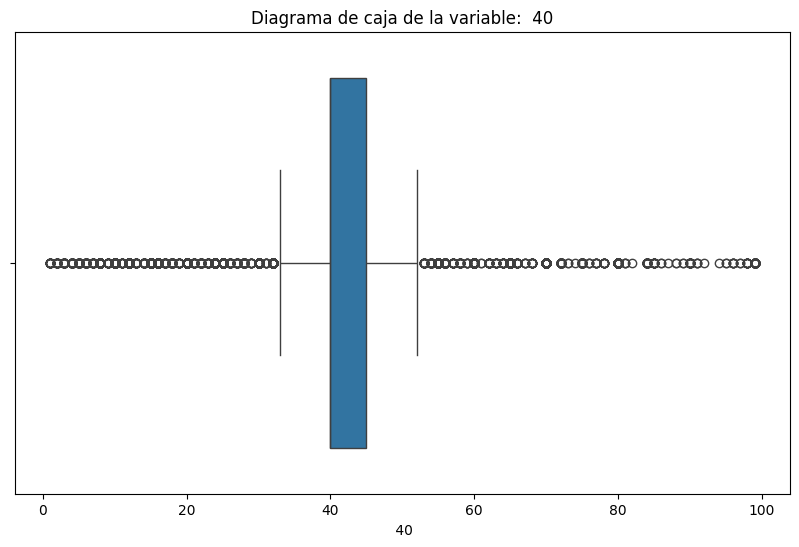

   39   77516   13   2174   0   40   State-gov_ ?   State-gov_ Federal-gov  \
0  50   83311   13      0   0   13          False                    False   
1  38  215646    9      0   0   40          False                    False   
2  53  234721    7      0   0   40          False                    False   
3  28  338409   13      0   0   40          False                    False   
4  37  284582   14      0   0   40          False                    False   

    State-gov_ Local-gov   State-gov_ Never-worked  ...  \
0                  False                     False  ...   
1                  False                     False  ...   
2                  False                     False  ...   
3                  False                     False  ...   
4                  False                     False  ...   

    United-States_ Scotland   United-States_ South   United-States_ Taiwan  \
0                     False                  False                   False   
1                   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Cargar el dataset
df = pd.read_csv('/workspace/dataset.csv')

# Ver las primeras filas del dataset
print(df.head())

# Información general del dataset
print(df.info())

# Descripción estadística
print(df.describe(include='all'))

# Identificación de columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", categorical_columns)

# Distribución de las variables categóricas con gráficos de barras
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.xticks(rotation=45)
    plt.show()

# Visualización de las variables numéricas con histogramas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de la variable numérica: {col}')
    plt.show()

# Diagrama de caja (boxplot) para detectar outliers en las variables numéricas
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Diagrama de caja de la variable: {col}')
    plt.show()

# Aplicar get_dummies
df_dummies = pd.get_dummies(df, columns=categorical_columns)
print(df_dummies.head())

# Inicializar OneHotEncoder con el parámetro actualizado
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(df[categorical_columns])

# Obtener nombres de las nuevas columnas
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Crear un DataFrame con los datos codificados
df_onehot = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenar con el DataFrame original (sin las columnas categóricas)
df_final_onehot = pd.concat([df.drop(columns=categorical_columns), df_onehot], axis=1)
print(df_final_onehot.head())

# Inicializar LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())